In [ ]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import umap
import json
import seaborn as sns
import sklearn
from sklearn.decomposition import PCA
import matplotlib
import matplotlib.pyplot as plt
import pickle
import re
import random

sns.set()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Using Yummy Data to Explore Food in Vector Space!

My friend and I had a funny question (in the days before ChatGPT existed): if we let primitive NLP models cook, what recipes would they make?
We started off with an EDA to look at what recipes look like if we look at it from a vectorized perspective - the results surprised us!

At the time (early in my university career), I was just starting to learn NLP techniques, so we elected to process our words with introductory NLP methods. I also didnt know what spaCy was at the time, so I did some processing manually. I am thankfully now both older and wiser.

## Preprocessing the Data

In [56]:
DATA_PATH = "./data/recipes_raw_nosource_fn.json"

In [57]:
data = pd.read_json(DATA_PATH)
data = data.drop(['picture_link'])
data = data.dropna(axis=1)

In [58]:
data

,p3pKOD6jIHEcjf20CCXohP8uqkG5dGi,S7aeOIrsrgT0jLP32jKGg4j.o9zi2DO,o9MItV9txfoPsUQ4v8b0vh1.VdjwfsK,5l1yTSYFifF/M2dfbD6DX28WWQpLWNK,kRBQSWtqYWqtkb34FGeenBSbC32gIdO,PmoGGX9RC5zbMJXtZH1SKzWKLFX4Aii,g2RYP1spIUlAYsytDMsdfLNQEOnLUrO,94NWE4F4C5NzgH0zYqSdmPM/G55BjKO,HdIbPB/8cgk17hAzbc2jUN4VBn//QKS,mC7Nb4F2S.DMCjZ39kzS/ak9GqEp4iO,...,CUZuiIs2F5A4u4EzEXB/yHN38So5CRy,08JThnwO3qzkhSKVuef6Ehg.HVPXt7C,0jaoQnb1iG0bnScGJOt/zmAl6lsOh6y,6Qp4fKIuJAkrukUvmccA8qWrezzLwFq,xwEq9YYRt37I/LTqQUWvAi1uSusxhDm,4bfMWxlbKhx/McJq/89k0SBdw.VvAzW,T8lWBA1fcVdjxhMSWuoAbGoy5Lj.A8m,f/coffo2TMs2J2gq5nTOUIqH2TRAkui,q3aDJc4zoEF5QT4e7Mn.ieQwV.DyHwS,7cXA77UpdDtIfBug2v6lEVIuV3Zcvhm
instructions,Toss ingredients lightly and spoon into a butt...,Watch how to make this recipe.\nSprinkle the s...,"In a large saucepan, let the beans soak in eno...",Watch how to make this recipe.\nPreheat the ov...,Special equipment: sushi mat\nCook the brown r...,Heat a large nonstick skillet over medium-high...,Sprinkle the saffron into 1/4 cup hot water; l...,"If using top-sliced buns, spread softened butt...",Cut around the stems of the peppers (reserving...,Preheat the oven to 450 degrees F. Put the cau...,...,Fill a glass or cocktail shaker with some ice....,Watch how to make this recipe.\nHeat a heavy m...,Preheat the oven to 250 degrees F\nIn a small ...,Bring a small saucepan of water to a boil. Sep...,Grease 8 cream horn metal cones. Cut the puff ...,Watch how to make this recipe.\nPreheat a gril...,Preheat the broiler. Cut the tomatoes in 1/2 c...,Heat the oil and butter in a large skillet ove...,Preheat oven to 350 degrees. On the top half o...,Watch how to make this recipe.\nIn a medium sa...
ingredients,"[1/2 cup celery, finely chopped, 1 small green...","[2 pounds skirt steak, cut into 1/2-inch dice,...","[1 1/2 cups dried black beans, picked over and...","[1 1/4 pounds ground chuck, One 15-ounce can t...","[1 cup rice, brown, medium-grain, cooked, 1/2-...","[1 tablespoon extra-virgin olive oil, 2 baby I...",[1/2 teaspoon lightly crumbled saffron threads...,[4 top--sliced hot-dog buns (or fashion your o...,"[6 green or red bell peppers, 1/2 cup olive oi...","[1 medium head cauliflower (about 2 pounds), c...",...,"[Ice, 1 slice jalapeno, seeded 1 by 1/4-inch p...","[1/4 cup butter, 1/3 cup sugar, 1 teaspoon gro...","[2 cups coconut milk, 1 short stalk lemon gras...","[2 large heads garlic, 1 cut-up chicken, about...","[1 sheet frozen puff pastry, thawed, 1 egg, 1 ...","[4 ears fresh corn, 2 heads Belgian endive, 2 ...","[4 large plum tomatoes, Salt and sugar, 1 1/2 ...","[3 tablespoons olive oil, 2 tablespoons unsalt...","[8 ounces butter, 8 ounces bittersweet chocola...",[3 (10.5-ounce) cans restaurant-style condense...
title,Grammie Hamblet's Deviled Crab,Infineon Raceway Baked Beans,Southwestern Black Bean Dip,Sour Cream Noodle Bake,Sushi Renovation,Middle-Eastern Eggplant Rounds,Saffron Jewel Rice,Maine Lobster Rolls,Stuffed Peppers with Pilaf,Cauliflower with Brown Butter and Crispy Crumbs,...,Spicy Agave Wave,Apple Chimichangas,Coconut-Kaffir Leaf Poached Halibut with Saute...,Chicken Braised with 20 Cloves of Garlic,Cream Horns,Summer Corn Salad,Zucchini Stuffed Tomatoes,Pepper Pasta Quick Cook,Chocolate Cake with Armagnac Ice Cream,Crabby Bisque


And here are the ingredients for one such recipe. Note the numbers and measurements, which we will remove to simplify our EDA.

In [59]:
data.loc['ingredients'][10]

C:\Users\sayan\AppData\Local\Temp\ipykernel_19240\910867606.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  data.loc['ingredients'][10]


['3 to 4 cups chicken stock, preferably homemade, recipe follows',
 '1 quart Roasted Winter Vegetables, recipe follows',
 'Kosher salt and freshly ground black pepper',
 '3 (5-pound) roasting chickens',
 '3 large yellow onions, unpeeled, quartered',
 '6 carrots, unpeeled, halved',
 '4 celery stalks with leaves, cut in thirds',
 '4 parsnips, unpeeled, cut in 1/2, optional',
 '20 sprigs fresh parsley',
 '15 sprigs fresh thyme',
 '20 sprigs fresh dill',
 '1 head garlic, unpeeled, cut in 1/2 crosswise',
 '2 tablespoons kosher salt',
 '2 teaspoons whole black peppercorns',
 '1 pound carrots, peeled',
 '1 pound parsnips, peeled',
 '1 large sweet potato, peeled',
 '1 small butternut squash (about 2 pounds), peeled and seeded',
 '3 tablespoons good olive oil',
 '1 1/2 teaspoons kosher salt',
 '1/2 teaspoon freshly ground black pepper',
 '2 tablespoons chopped fresh flat-leaf parsley']

Removing measurements:

In [60]:
punctuation = r"""!"#$%&*+,-.:;<=>?@[\]^_`{|}()~1234567890/"""
punc_re = re.compile("[%s]|ounces|ounce|can|cans|cups|pounds|pound|cup|cups|tablespoons|tablespoon|teaspoons|teaspoon|inch|cm|one|two|three|serving|servings" % punctuation)
for ind, item in data.items():
    new_ingredients = []
    if type(item['ingredients']) == np.float64:
        data = data.drop(ind, axis=1)
        print(item['ingredients'])
    else:
        for ingredient in item['ingredients']:
            new_ingredient = punc_re.sub("", ingredient)
            new_ingredient = new_ingredient.lower()
            new_ingredients += [new_ingredient]
        data.at["ingredients", ind] = new_ingredients

In [61]:
data

,p3pKOD6jIHEcjf20CCXohP8uqkG5dGi,S7aeOIrsrgT0jLP32jKGg4j.o9zi2DO,o9MItV9txfoPsUQ4v8b0vh1.VdjwfsK,5l1yTSYFifF/M2dfbD6DX28WWQpLWNK,kRBQSWtqYWqtkb34FGeenBSbC32gIdO,PmoGGX9RC5zbMJXtZH1SKzWKLFX4Aii,g2RYP1spIUlAYsytDMsdfLNQEOnLUrO,94NWE4F4C5NzgH0zYqSdmPM/G55BjKO,HdIbPB/8cgk17hAzbc2jUN4VBn//QKS,mC7Nb4F2S.DMCjZ39kzS/ak9GqEp4iO,...,CUZuiIs2F5A4u4EzEXB/yHN38So5CRy,08JThnwO3qzkhSKVuef6Ehg.HVPXt7C,0jaoQnb1iG0bnScGJOt/zmAl6lsOh6y,6Qp4fKIuJAkrukUvmccA8qWrezzLwFq,xwEq9YYRt37I/LTqQUWvAi1uSusxhDm,4bfMWxlbKhx/McJq/89k0SBdw.VvAzW,T8lWBA1fcVdjxhMSWuoAbGoy5Lj.A8m,f/coffo2TMs2J2gq5nTOUIqH2TRAkui,q3aDJc4zoEF5QT4e7Mn.ieQwV.DyHwS,7cXA77UpdDtIfBug2v6lEVIuV3Zcvhm
instructions,Toss ingredients lightly and spoon into a butt...,Watch how to make this recipe.\nSprinkle the s...,"In a large saucepan, let the beans soak in eno...",Watch how to make this recipe.\nPreheat the ov...,Special equipment: sushi mat\nCook the brown r...,Heat a large nonstick skillet over medium-high...,Sprinkle the saffron into 1/4 cup hot water; l...,"If using top-sliced buns, spread softened butt...",Cut around the stems of the peppers (reserving...,Preheat the oven to 450 degrees F. Put the cau...,...,Fill a glass or cocktail shaker with some ice....,Watch how to make this recipe.\nHeat a heavy m...,Preheat the oven to 250 degrees F\nIn a small ...,Bring a small saucepan of water to a boil. Sep...,Grease 8 cream horn metal cones. Cut the puff ...,Watch how to make this recipe.\nPreheat a gril...,Preheat the broiler. Cut the tomatoes in 1/2 c...,Heat the oil and butter in a large skillet ove...,Preheat oven to 350 degrees. On the top half o...,Watch how to make this recipe.\nIn a medium sa...
ingredients,"[ celery finely chopped, small green pepper ...","[ skirt steak cut into dice, kosher salt and...","[ dried black beans picked over and rinsed, ...","[ ground chuck, one tomato sauce, salt, ...","[ rice brown mediumgrain cooked, quinoa, sw...","[ extravirgin olive oil, baby italian eggpla...","[ lightly crumbled saffron threads, sugar, ...",[ topsliced hotdog buns or fashion your own to...,"[ green or red bell peppers, olive oil, oni...",[ medium head cauliflower about cut into bit...,...,"[ice, slice jalapeno seeded by piece, fres...","[ butter, sugar, ground cinnamon, large ...","[ coconut milk, short stalk lemon grass fine...","[ large heads garlic, cutup chicken about , ...","[ sheet frozen puff pastry thawed, egg, wat...","[ ears fresh corn, heads belgian endive, ol...","[ large plum tomatoes, salt and sugar, zucc...","[ olive oil, unsalted butter, medium clove...","[ butter, bittersweet chocolate, whole egg...",[ s restaurantstyle condensed crab bisque rec...
title,Grammie Hamblet's Deviled Crab,Infineon Raceway Baked Beans,Southwestern Black Bean Dip,Sour Cream Noodle Bake,Sushi Renovation,Middle-Eastern Eggplant Rounds,Saffron Jewel Rice,Maine Lobster Rolls,Stuffed Peppers with Pilaf,Cauliflower with Brown Butter and Crispy Crumbs,...,Spicy Agave Wave,Apple Chimichangas,Coconut-Kaffir Leaf Poached Halibut with Saute...,Chicken Braised with 20 Cloves of Garlic,Cream Horns,Summer Corn Salad,Zucchini Stuffed Tomatoes,Pepper Pasta Quick Cook,Chocolate Cake with Armagnac Ice Cream,Crabby Bisque


In [62]:
data.loc['ingredients'][0]

C:\Users\sayan\AppData\Local\Temp\ipykernel_19240\3221995973.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  data.loc['ingredients'][0]


['  celery finely chopped',
 ' small green pepper finely chopped',
 '  finely sliced green onions',
 '  chopped parsley',
 '  crabmeat',
 '   coarsely crushed cracker crumbs',
 '  salt',
 '  dry mustard',
 'dash hot sauce',
 '  heavy cream',
 '  melted butter']

This will be much easier to work with!

## Initial EDA

### Word frequency

In [63]:
dict_of_words = {}

for ingredients in data.loc['ingredients',:]:
    for ingredient in ingredients:
        for word in ingredient.split():
            word = word.rstrip(",.")
            if not word in dict_of_words.keys():
                dict_of_words[word] = 1
            else:
                dict_of_words[word] += 1

In [64]:
df_words = pd.DataFrame.from_dict(dict_of_words, "index", columns=["count"])
df_words = df_words.sort_values('count', ascending=False)

In [71]:
print(df_words.head(100))

         count
and      61572
chopped  53817
salt     52539
pepper   45672
ground   38587
...        ...
rice      5009
ginger    4922
with      4877
yellow    4794
drained   4728

[100 rows x 1 columns]


In [76]:
# Showing the top n words and their counts ; yes I could use df.head() but the output is vertical and I want to maximize screen space
disp_n = 100
top_words = (df_words[0:].index.values)
words_str = ""
for i, word in enumerate(top_words[0:disp_n]):
    words_str += str(i+1) + ". " + word + " (" + str(df_words.loc[word]['count']) + ")  |  "
print(words_str)

1. and (61572)  |  2. chopped (53817)  |  3. salt (52539)  |  4. pepper (45672)  |  5. ground (38587)  |  6. oil (38280)  |  7. fresh (37210)  |  8. or (32433)  |  9. for (29698)  |  10. sugar (28469)  |  11. freshly (27545)  |  12. black (25904)  |  13. butter (24818)  |  14. olive (22777)  |  15. sliced (22674)  |  16. garlic (22615)  |  17. to (21578)  |  18. large (21136)  |  19. red (18900)  |  20. into (18738)  |  21. kosher (18198)  |  22. cut (18137)  |  23. leaves (17779)  |  24. finely (17752)  |  25. flour (15841)  |  26. juice (15299)  |  27. plus (15293)  |  28. onion (15261)  |  29. cream (14956)  |  30. minced (14756)  |  31. white (14545)  |  32. diced (14271)  |  33. peeled (13819)  |  34. cloves (13692)  |  35. lemon (13586)  |  36. sauce (13130)  |  37. of (12950)  |  38. grated (12831)  |  39. unsalted (12416)  |  40. water (11986)  |  41. small (11890)  |  42. about (11801)  |  43. cheese (11725)  |  44. chicken (11573)  |  45. powder (11153)  |  46. vinegar (10022

I am surprised that conjunction words didn't rank higher! Of course, 'and' ranked as highest but the second-highest, 'or' only ranks 8th.

[Text(0.5, 1.0, 'Frequency Distribution of Words'),
 Text(0.5, 0, 'Word'),
 Text(0, 0.5, 'Count')]

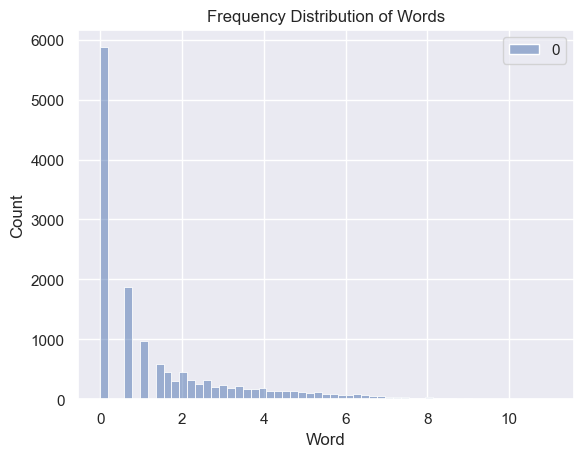

In [33]:
sns.histplot(np.log(df_words.values), kde=False).set(title='Frequency Distribution of Words', xlabel='Word', ylabel='Count')


Now let's make a bag of words out of this. We actually did a modified bag-of-words approach, only noting the presence of the word and not the count. This is because we figured ingredients lists should mostly be unique in the first place, and words that would repeat would probably not be particularly important (ie: conjunctions, adjectives, etc). This approach is incredibly naive but still led to really interesting results for the EDA! A much better approach would be to use word vector models or LLMs - this is something I might do if I revist this project properly in the future!

In [77]:
zero_data = np.zeros(shape=(len(data.T), len(list(top_words))))
final_data = pd.DataFrame(zero_data, columns=list(top_words))

In [78]:
top_words_set = set(top_words)
i = 0
for ingredients in data.loc['ingredients',:]:
    bigset = set()
    for ingredient in ingredients:
        bigset.update(ingredient.split())
    for ingredient in top_words_set.intersection(bigset):
        final_data.loc[i,ingredient] = 1
    if (i % 1000 == 0):
        print(bigset)
    i += 1

{'small', 'coarsely', 'celery', 'finely', 'cracker', 'crumbs', 'crushed', 'mustard', 'hot', 'pepper', 'crabmeat', 'butter', 'onions', 'green', 'dash', 'chopped', 'dry', 'melted', 'sauce', 'sliced', 'cream', 'heavy', 'parsley', 'salt'}
{'minced', 'fresh', 'rotelle', 'taste', 'grated', 'juices', 'pois', 'carrots', 'freshly', 'oil', 'garlic', 'or', 'each', 'frozen', 'to', 'squash', 'cooking', 'parmesan', 'yellow', 'and', 'tomatoes', 'including', 'thinly', 'pepper', 'seeded', 'petits', 'plum', 'liquid', 'penne', 'cheese', 'diced', 'chicken', 'sliced', 'olive', 'florets', 'basil', 'reserve', 'heavy', 'pasta', 'cream', 'cloves', 'salt', 'stock', 'parsley', 'broccoli'}
{'dried', 'lemon', 'feta', 'vinegar', 'frying', 'grated', 'slices', 'kosher', 'rubbed', 'half', 'finely', 'oil', 'falafel', 'extravirgin', 'juice', 'a', 'peppers', 'of', 'leaves', 'mint', 'vegetable', 'parmesan', 'and', 'roasted', 'for', 'your', 'about', 'chopped', 'wedges', 'cheese', 'wine', 'tahini', 'fingers', 'olive', 'cucu

In [79]:
final_data

,and,chopped,salt,pepper,ground,oil,fresh,or,for,sugar,...,grainsweetened,callets,douglas,alpha,halfdried,secrets,blondies,cayennne,tripolini,kojuchang
0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59623,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59624,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59625,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59626,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [84]:
pickle.dump(final_data, open( "final_data.p", "wb" ))

pca = PCA(n_components=2)
pcaed = pca.fit_transform(final_data)

In [98]:
pcaed.shape

(59628, 2)

In [87]:
top_comp = np.argsort(pca.components_)
axis1_str = "AXIS 1: "
axis2_str = "AXIS 2: "

for i in range(20):
    axis1_str += top_words[top_comp[0,i]] + ", "

for i in range(20):
    axis2_str += top_words[top_comp[1,i]] + ", "

print(axis1_str)
print(axis2_str)

AXIS 1: sugar, vanilla, extract, chocolate, cream, baking, flour, butter, milk, eggs, egg, unsalted, allpurpose, soda, ice, granulated, cinnamon, confectirs', temperature, room, 
AXIS 2: olive, red, vinegar, lime, garlic, tomatoes, vodka, soy, oz, wine, basil, extravirgin, green, olives, mint, sesame, oil, bell, leaves, taste, 


[Text(0.5, 1.0, 'PCA of Recipe BoW Distinguishes Btn Desserts and Savoury Foods'),
 Text(0.5, 0, 'Sweet'),
 Text(0, 0.5, 'Savoury')]

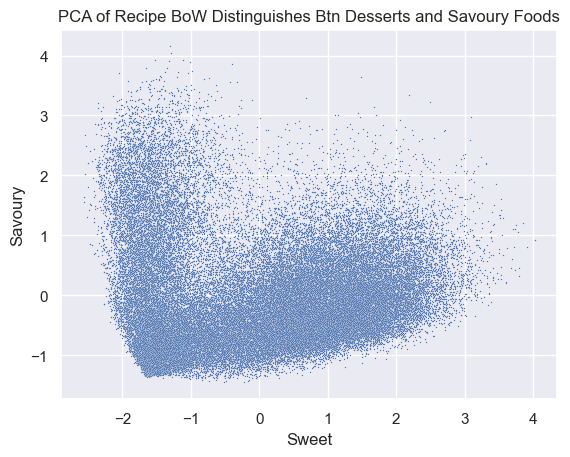

In [96]:
# plt.scatter(pcaed[:, 0], pcaed[:, 1], s=0.01)

sns.scatterplot(x=pcaed[:, 0], y=pcaed[:, 1], s=1
                ).set(title='PCA of Recipe BoW Distinguishes Btn Desserts and Savoury Foods',
                      xlabel="Sweet",
                      ylabel="Savoury")

Seeing what results we get with a UMAP component analysis instead:

In [108]:
c = final_data.sample(8000)
embedding = umap.UMAP(n_neighbors=80, min_dist=0.1).fit_transform(c)

In [44]:
matplotlib.rcParams['figure.dpi'] = 288

Baked Chicken Saltimbocca
['4 boneless, skinless chicken breast halves (about 1-1/4 lbs.)', '1 egg, slightly beaten', '3/4 cup Italian seasoned dry bread crumbs', '2 ounces thinly sliced prosciutto or deli boiled ham', '1 jar Bertolli® Vineyard Premium Collections Marinara with Burgundy Wine Sauce', '4 ounces fresh mozzarella cheese, thinly sliced', '8 ounces spaghetti, cooked and drained']
Tequila Bars
['1 12-ounce box vanilla wafers', '1/2 cup pine nuts', '3/4 cup unsalted butter (1 1/2 sticks), melted', '1/3 cup tequila', '1/2 cup fresh lime juice', '5 large egg yolks, plus 2 egg whites', '1 14-ounce can sweetened condensed milk', '1 tablespoon sugar']
Avocado Cristo with Cherry Tomato Jam and Balsamic Reduction
['8 eggs, lightly beaten', '4 ounces milk', '2 garlic cloves, minced', '1 teaspoon cumin', 'Salt and pepper', '1 loaf sourdough bread cut in 1/2-inch slices', '2 avocados, peeled and sliced', '6 ounces Monterey Jack', '1 pound cherry tomatoes, chopped', '2 ounces sugar', '6 

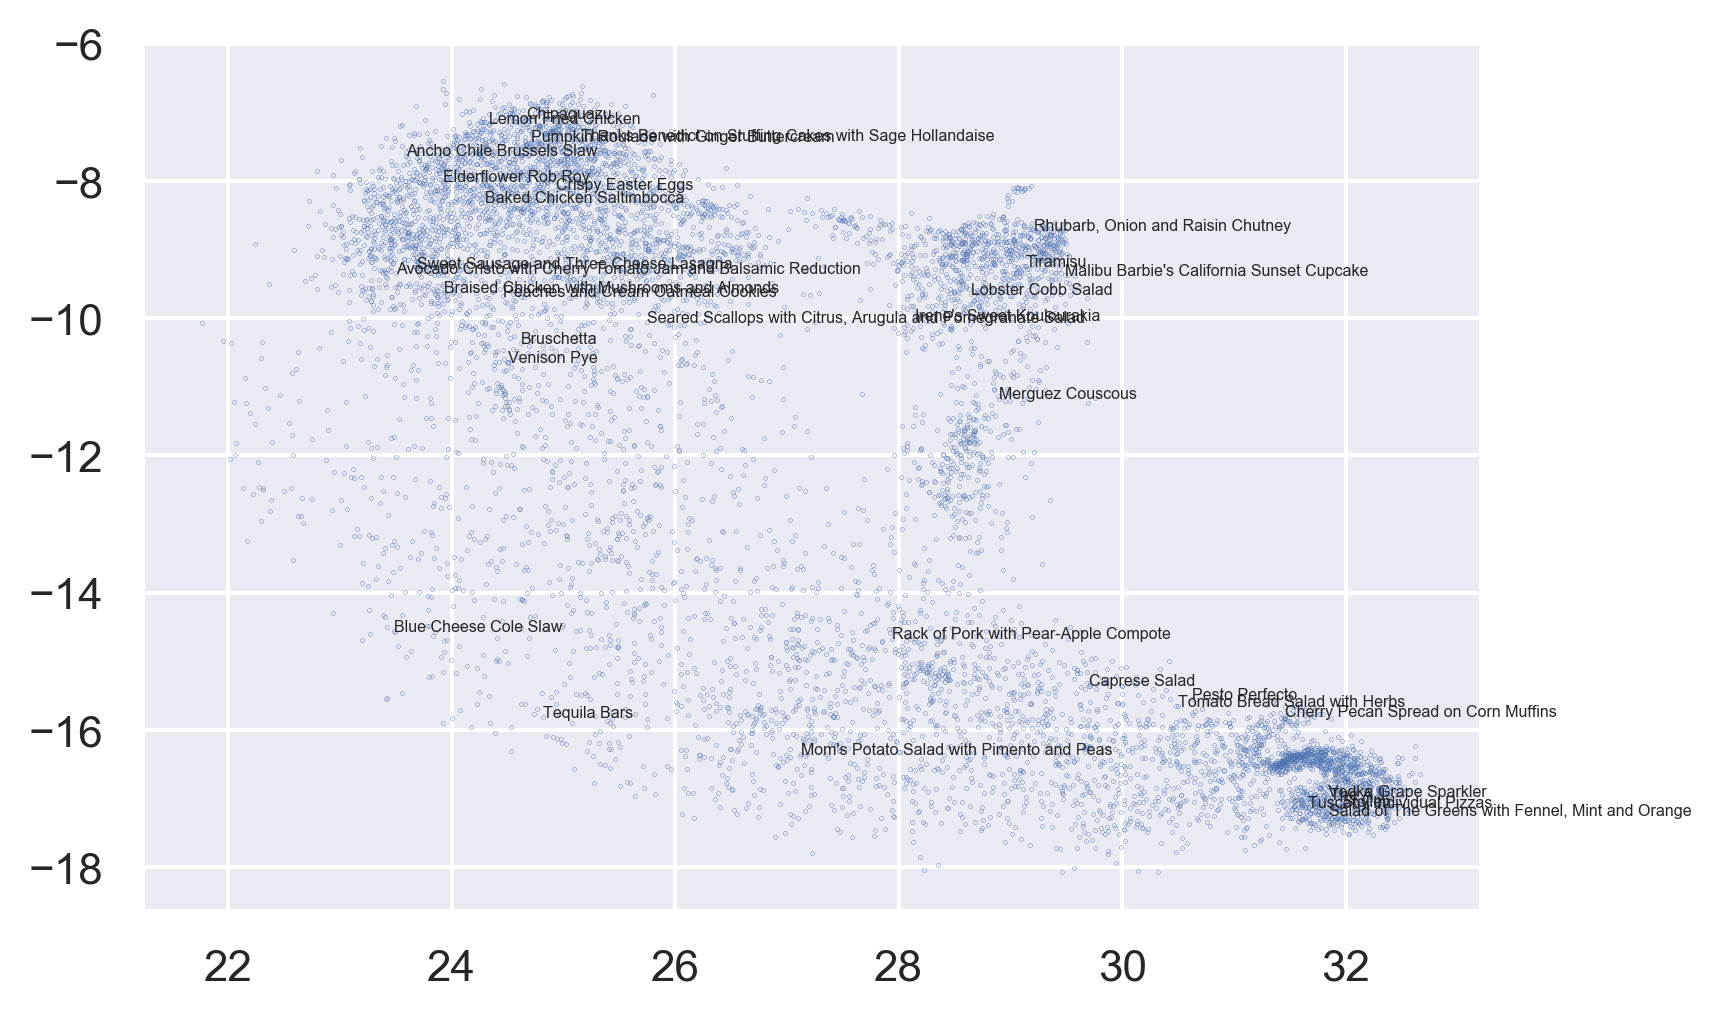

In [53]:
fig, ax = plt.subplots()
titles = data.T.loc[:,"title"]

for i in range(3000):
    if random.randint(1,89) == 1:
        ax.annotate(titles[i], (embedding[:, 0][i], embedding[:, 1][i]), size = 4)
        print(data.loc['title',:][i])
        print(data.loc['ingredients', :][i])
ax.scatter(embedding[:, 0], embedding[:, 1],s = 0.01)

In [ ]:
pickle.dump(embedding, open( "embedding.p", "wb" ))